# Financial Returns

## Returns Calculation and Distribution

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_6836/datasets/MSFTPrices.csv'

StockPrices = pd.read_csv(filepath, parse_dates=['Date'])
StockPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
Date        4561 non-null datetime64[ns]
Open        4561 non-null float64
High        4561 non-null float64
Low         4561 non-null float64
Close       4561 non-null float64
Volume      4561 non-null int64
Adjusted    4561 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 249.5 KB


In [185]:
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [186]:
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


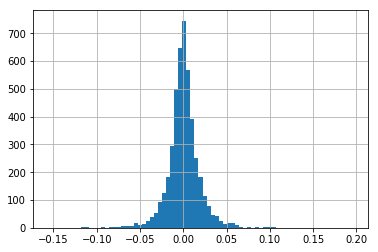

In [187]:
StockPrices['Returns'].dropna().hist(bins=75);

# Moments of Distributions
- Mean ($\mu$)
- Variance ($\sigma^2$)
- Skewness
- Kurtosis

### The Normal Distribution
There are many types of distributions. Some are normal and some are non-normal. A random variable with a **Gaussian distribution** is said to be normally distributed.

Normal Distributions have the following properties:
- Mean = ($\mu$)
- Variance ($\sigma^2$)
- Skewness = 0
- Kurtosis = 3

### The Standard Normal Distribution
- $\sigma = 1$
- $\mu = 0$

### Comparing against a Normal Distribution
- Normal distributions have a skewness near 0 and a kurtosis near 3.
- Financial returns tend not to be normally distributed
- Financial returns can have high kurtosis

In [188]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print('Average Daily Return: {}'.format(mean_return_daily))

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print('Annualized Average Return: {}'.format(mean_return_annualized))

Average Daily Return: 0.0003777754643575774
Annualized Average Return: 0.09985839482858783


### Standard Deviation (Volatility)
- $\sigma$ or referred to as *volatility*
- Variance = $\sigma^2$
- An investment with higher volatility is viewed as a higher risk investment
- Measures the dispersion of returns

![](img/normal-dist1.png)
![](img/normal-dist2.png)

In [189]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print('Standard Deviation: {}'.format(sigma_daily))

# Calculate the daily variance
variance_daily = sigma_daily**2
print('Variance: {}'.format(variance_daily))

Standard Deviation: 0.019341100408708317
Variance: 0.00037407816501973704


### Scaling Volatility
- Volatility scales with the square root of time
- Typically asuume 252 trading days in a given year, and 21 trading days in a given month.

$\sigma_{Annual} = \sigma_{Daily} * \sqrt{252}$

$\sigma_{Monthly} = \sigma_{Daily} * \sqrt{21}$

In [190]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print('Annualized Standard Deviation: {}'.format(sigma_annualized))

# Calculate the annualized variance
variance_annualized = sigma_annualized ** 2
print('Annualized Variance: {}'.format(variance_annualized))

Annualized Standard Deviation: 0.3070304505826315
Annualized Variance: 0.09426769758497373


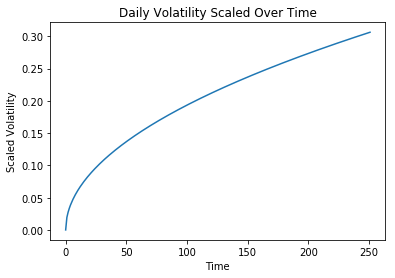

In [191]:
plt.plot(sigma_daily*np.sqrt(np.arange(0, 252)))
plt.xlabel('Time')
plt.ylabel('Scaled Volatility')
plt.title('Daily Volatility Scaled Over Time');

## Skewness
- **Negative Skew:** right-leaning curve
- **Positive Skew:** left-learning curve
- In finance, you would tend to want positive skewness

The difference in the length and fatness of the tails depending on the skewness

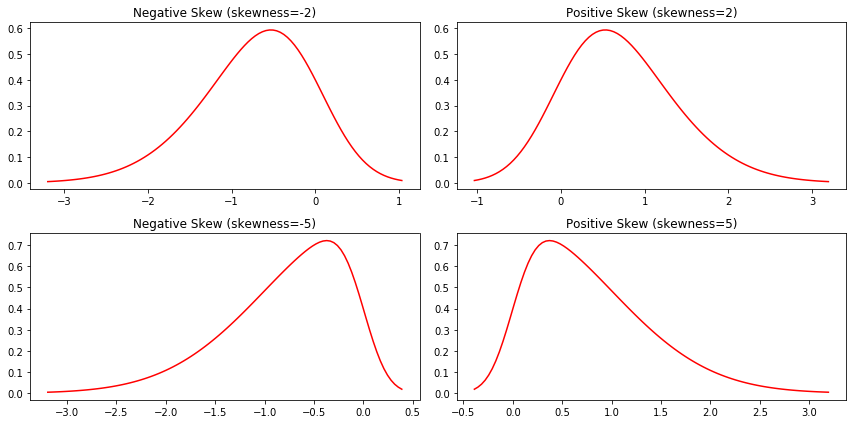

In [192]:
from scipy.stats import skew, skewnorm

fig, ax = plt.subplots(2, 2, figsize=(12,6))

a = -2
x = np.linspace(skewnorm.ppf(0.0014,a), skewnorm.ppf(0.9986,a),100)
ax[0,0].plot(x, skewnorm.pdf(x,a), 'r-')
ax[0,0].set_title('Negative Skew (skewness=-2)')

a = 2
x = np.linspace(skewnorm.ppf(0.0014,a), skewnorm.ppf(0.9986,a),100)
ax[0,1].plot(x, skewnorm.pdf(x,a), 'r-')
ax[0,1].set_title('Positive Skew (skewness=2)');

a = -5
x = np.linspace(skewnorm.ppf(0.0014,a), skewnorm.ppf(0.9986,a),100)
ax[1,0].plot(x, skewnorm.pdf(x,a), 'r-')
ax[1,0].set_title('Negative Skew (skewness=-5)')

a = 5
x = np.linspace(skewnorm.ppf(0.0014,a), skewnorm.ppf(0.9986,a),100)
ax[1,1].plot(x, skewnorm.pdf(x,a), 'r-')
ax[1,1].set_title('Positive Skew (skewness=5)')

plt.tight_layout()

scipy.stats.skew() to compute the skewness. The skewness being higher than 0 suggests non-normality.

In [193]:
skew(StockPrices['Returns'].dropna())

0.21935459193067852

## Kurtosis
Kurtosis is a measure of the thickness of the tails of a distribution
- Most financial returns are *leptokurtic*
- **Leptokurtic:** When a distribution has positive *excess kurtosis* (kurtosis > 3)
- **Excess Kurtosis:** Subtract 3 from the sample kurtosis to get Excess Kurtosis
- If excess kurtosis is higher than 0, then kurtosis is higher than a normal distribution.
- In finance, high excess kurtosis = high risk. When large movements in returns happen often, this can be a bad thing for a portfolio if it moves in a wrong direction.
- High kurtosis distributions are said to have "thick tails", which means that outliers, such as extreme negative and positive returns, are more common.

Since Kurtosis is mostly compared to a normal distribution, many functions in Python will automatically return Excess Kurtosis.



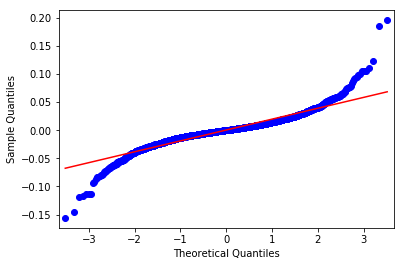

In [194]:
from statsmodels.graphics.gofplots import qqplot

qqplot(StockPrices['Returns'].dropna(), line='s')
plt.show()

Comparing with theoretical quantiles of Normal Distribution. The quantiles diverge on both tails of the distribution. The divergence near the tails is an example of kurtosis.

In [195]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(StockPrices['Returns'].dropna())
print('Excess kurtosis: {}'.format(excess_kurtosis))

# Derive the true fourth moment of the returns distribution
true_kurtosis = excess_kurtosis + 3
print('True kurtosis: {}'.format(true_kurtosis))

Excess kurtosis: 10.31457261802553
True kurtosis: 13.31457261802553


### Testing for Normality in Python

If the kurtosis is greater than 3, and skewness is non-zero, the data is most likely non-normal.

You can use the **Shapiro-Wilk statistical test** to estimate the probability that the data is normally distributed.

The null hypothesis of the **Shapiro-Wilk test** is that the data are normally distributed.

scipy.stats.shapiro() returns two values
- t-stat of the test
- p-value

In [196]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(StockPrices['Returns'].dropna())
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

if p_value <= 0.05:
    print('Null hypothesis of normality is rejected.')
else:
    print('Null hypothesis of normality is accepted.')

Shapiro results: (0.9003633260726929, 0.0)
P-value:  0.0
Null hypothesis of normality is rejected.
